#### 1. Problem Statement

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### 2. Data Gathering

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
data_dict = fetch_california_housing()

In [6]:
data_dict.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
df = pd.DataFrame(data = data_dict.data,columns = data_dict.feature_names)

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
data_dict

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
df['MedHouseVal'] = data_dict.target

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 3. Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<Axes: xlabel='MedInc', ylabel='Density'>

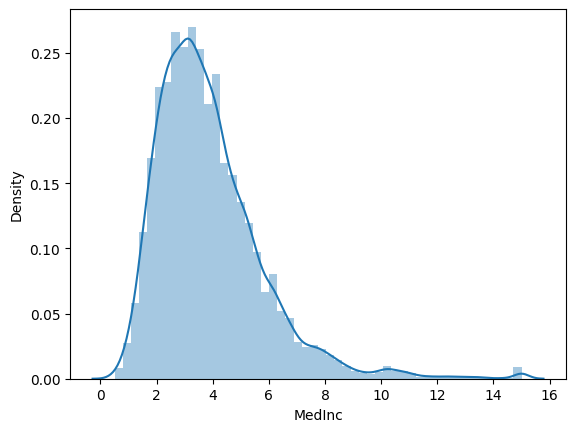

In [15]:
sns.distplot(df['MedInc'])

<Axes: xlabel='MedInc', ylabel='Density'>

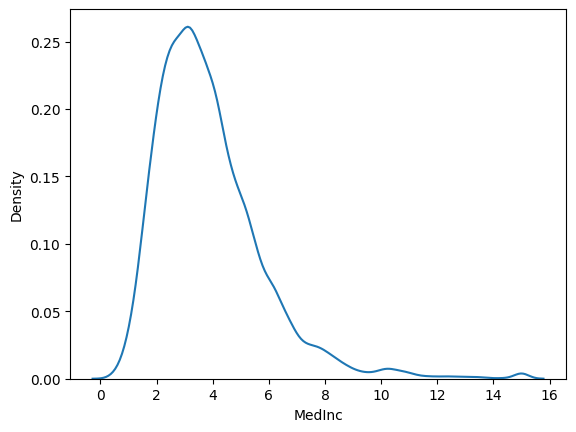

In [16]:
sns.kdeplot(df['MedInc'])

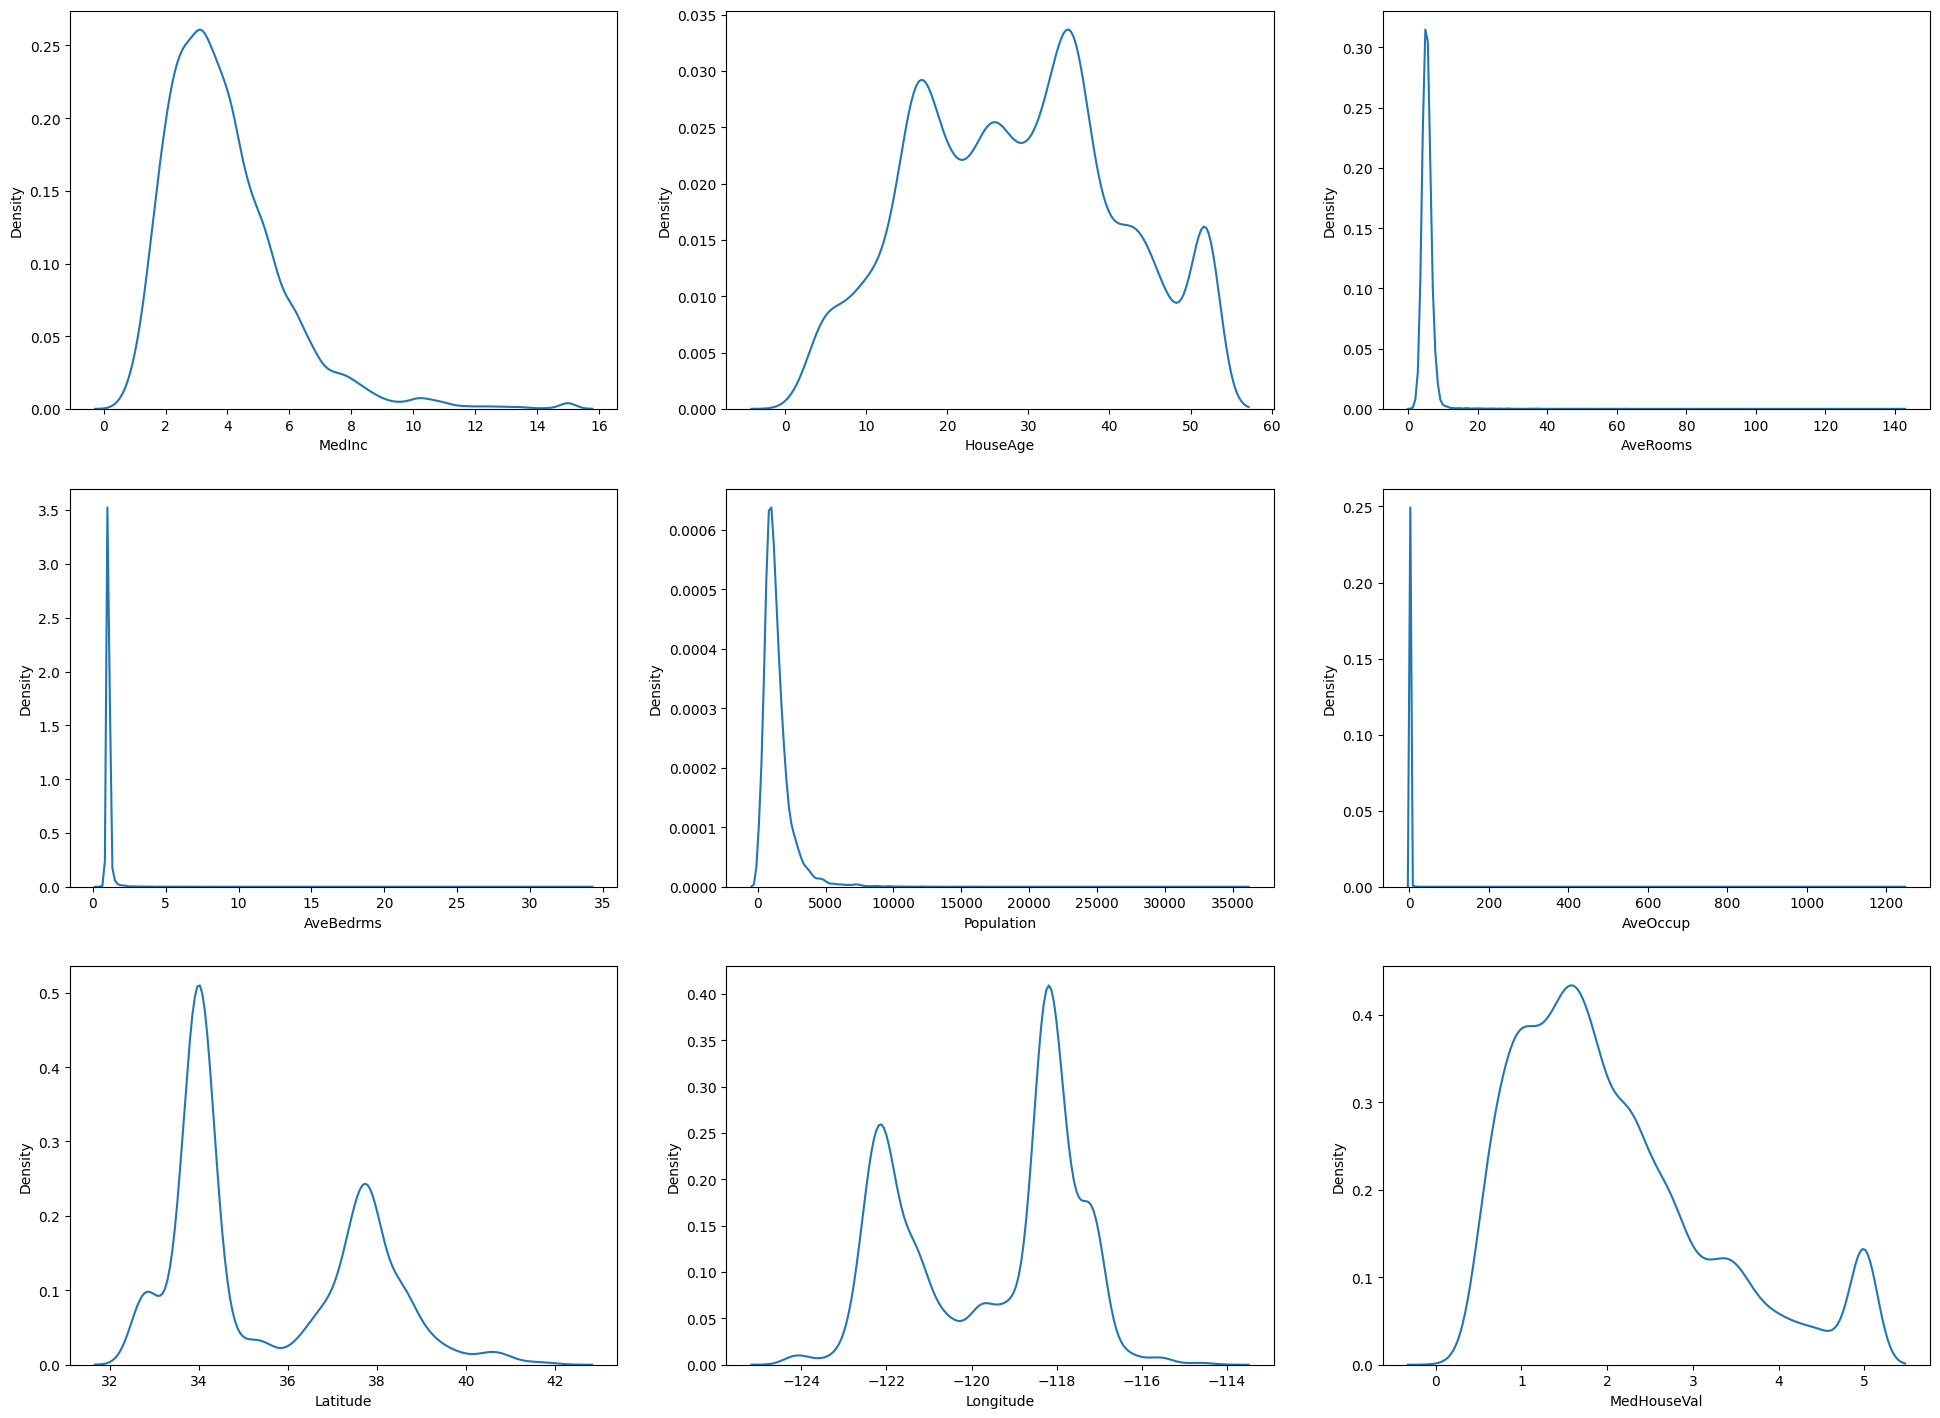

In [17]:
i = 1
plt.figure(figsize=(24,30))
for col in df.columns:
    plt.subplot(5,3,i)
    sns.kdeplot(df[col])
    i += 1

<Axes: >

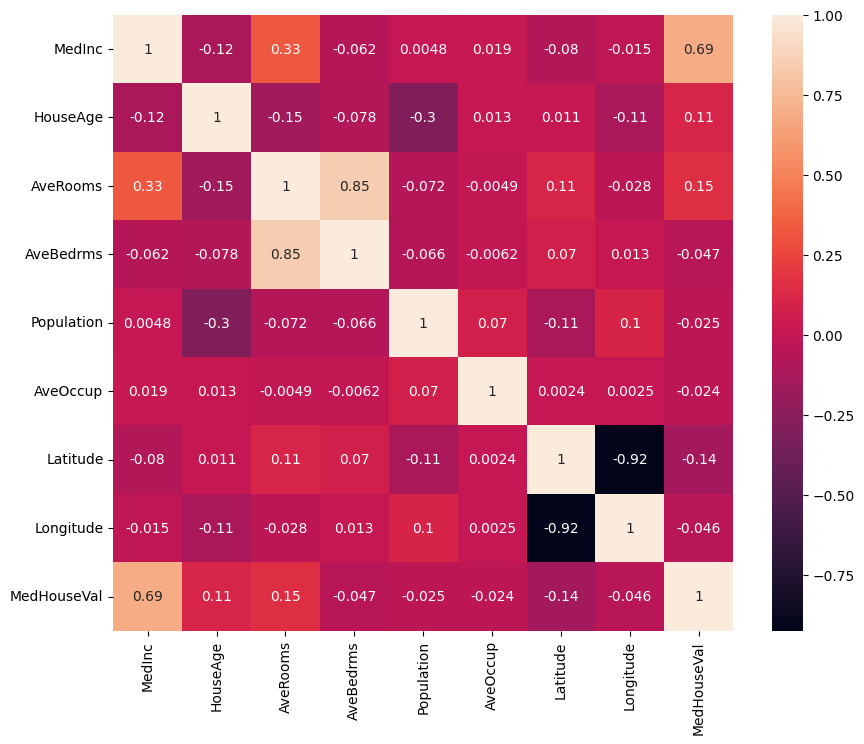

In [18]:
# checking the correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

<Axes: >

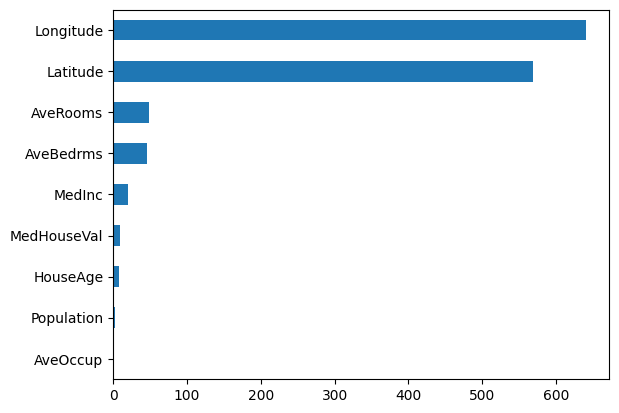

In [19]:
# Checking the multicolinearity using vif(variance inflation factor)
vif_list = []
for i in range(df.shape[1]): # It will access the columns
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)

vif_series = pd.Series(vif_list, index = df.columns)
vif_series.sort_values().plot(kind = "barh")

#### 4. Feature Engineering

In [20]:
# Train the model 

In [21]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [22]:
x = df.drop('MedHouseVal', axis= 1)

In [23]:
y = df['MedHouseVal']

In [24]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [27]:
lr_model = LinearRegression()

In [28]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = lr_model.predict(x_test)

#### 5. Model Evalution

In [30]:
# Mean Squared error - It represent the standard derivation of actual value and the predicted values
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(0.5232537003345413)

In [31]:
# Root means Squared error - It is a square root of Mean Squared Error
rmse = np.sqrt(mse)
rmse

np.float64(0.7233627722896315)

In [32]:
# Mean Absolute Error - It measures the acyual value and predicted value
mae = mean_absolute_error(y_test, y_pred)
mae

np.float64(0.5299096107680216)

In [33]:
# r2_score = The R² Score (Coefficient of Determination) is a regression metric that tells us how well the model’s predictions approximate the actual values.
r2score = r2_score(y_test,y_pred)
r2score

0.6095973292513879

In [34]:
###### 
print(f"Mean Squared Error: {mse:0.4f}")
print(f"Root mean Squared Error: {rmse:0.4f}")
print(f"Mean Absolute Error: {mae:0.4f}")
print(f"R2 Score: {r2score:0.4f}")

Mean Squared Error: 0.5233
Root mean Squared Error: 0.7234
Mean Absolute Error: 0.5299
R2 Score: 0.6096


#### 6. Feature Scaling/ Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(x)

MinMaxScaler()

In [38]:
x_scaled = scaler.transform(x)
x_scaled

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.00149943, 0.5674814 ,
        0.21115538],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.00114074, 0.565356  ,
        0.21215139],
       [0.46602805, 1.        , 0.05275646, ..., 0.00169796, 0.5642933 ,
        0.21015936],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.0013144 , 0.73219979,
        0.31175299],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.0011515 , 0.73219979,
        0.30179283],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.00154886, 0.72582359,
        0.30976096]])

In [39]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [40]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [41]:
x_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


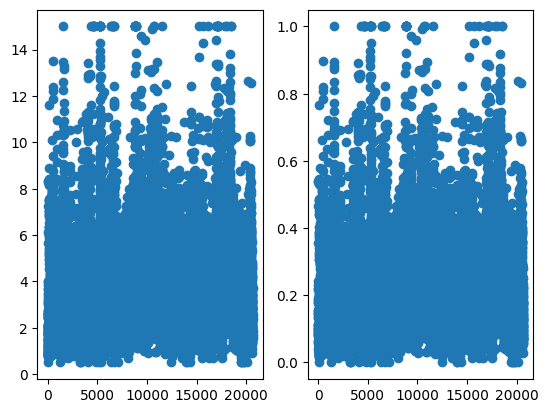

In [42]:
# plt.figure(figsize=())
plt.subplot(1,2,1)
plt.scatter(x.index,x['MedInc'])
plt.subplot(1,2,2)
plt.scatter(x_scaled.index,x_scaled['MedInc'])

In [43]:
xs_train, xs_test, y_train, y_test = train_test_split(x_scaled,y)

In [44]:
lr_model = LinearRegression()

In [45]:
lr_model.fit(xs_train, y_train)

LinearRegression()

In [46]:
y_pred = lr_model.predict(xs_test)

In [47]:
y_pred

array([3.05081895, 3.0030747 , 1.63394961, ..., 0.54424494, 1.7103789 ,
       2.27642851])

In [48]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse:0.4f}")
print(f"Root mean Squared Error: {rmse:0.4f}")
print(f"Mean Absolute Error: {mae:0.4f}")
print(f"R2 Score: {r2score:0.4f}")

Mean Squared Error: 0.5297
Root mean Squared Error: 0.7278
Mean Absolute Error: 0.5296
R2 Score: 0.5977


In [49]:
# Previous Accuracy/Before Scalling

# Mean Squared Error: 0.5214
# Root mean Squared Error: 0.7221
# Mean Absolute Error: 0.5295
# R2 Score: 0.6044

In [50]:
# latest Accuracy/After Scalling

# Mean Squared Error: 0.5527
# Root mean Squared Error: 0.7434
# Mean Absolute Error: 0.5453
# R2 Score: 0.5965

#### Assumptions of linear regression 

In [ ]:
residual = y_test - y_pred
residual

##### 1. Linear Relationship Between Input and output

##### 2. Multicolinearity

##### 3. Normality of residual 

##### 4. Homoscedasticity

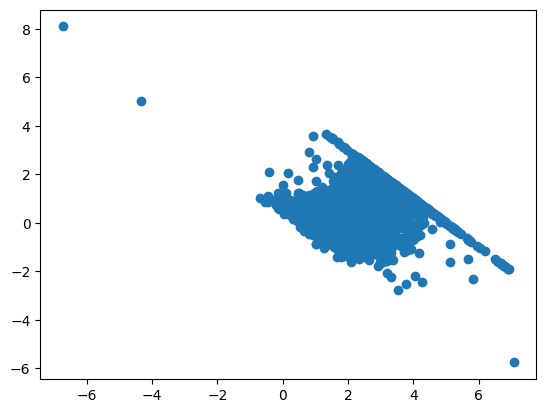

In [55]:
plt.scatter(y_pred,residual)

##### 5. No Autocorrelation in the error

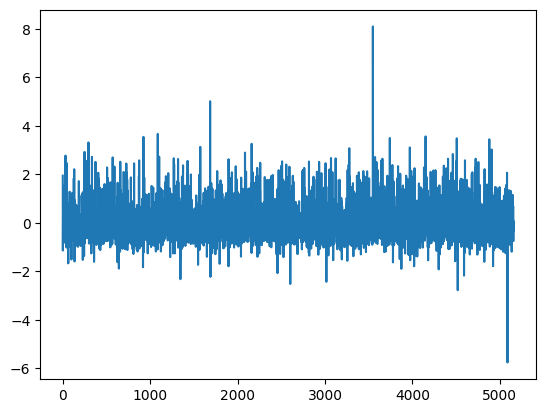

In [53]:
plt.plot(np.array(residual))

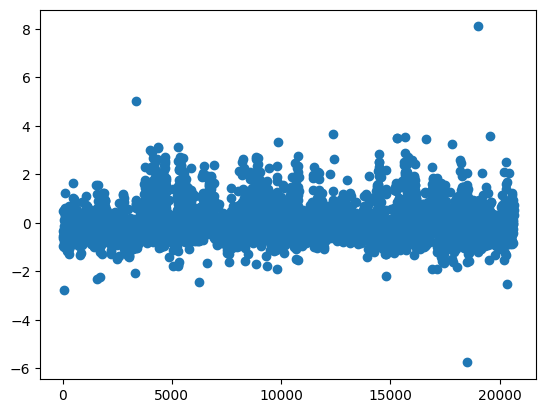

In [54]:
plt.scatter(residual.index, residual)

#### Continue With EDA

In [56]:
### Testing if the data is normaliy distributed